# 1 a)
### PisaTulos = B0 + B1 * pienKuin20 + B2 * suurKuin25 + B3 * luokkaKoko + B4 * pienKuin20 * luokkaKoko + B5 * suurKuin25 * luokkaKoko

Oheisessa mallissa siis parametreina kaksi dummy-muuttujaa, luokkakoko "jatkuvana" ja näiden interaktiotermit. Mahdollista olisi myös jättää viimeiset kolme termiä pois ja sisällyttää pelkät dummy-muuttujat ja vakio. 

Jos haluttaisiin yleiseimpi kuvaus voitaisiin myös käyttää mallia jossa on luokkako ja sen kokreampia potensseja. 
# b) ja c)
B0 on perustaso normaalikokoisessa (20-25) luokassa, B1 on positiivinen ja B2 negatiivinen. B3, B4 ja B5 ovat kaikki nollia sillä luokkakoon vaikutus muuttuu ainostaan ryhmästä toiseen siirrytäessä ja ryhmän sisällä luokkakoon kulmakerroin on nolla.  
Malli siis tuottaa kolme regressiosuoraa joiden vakiot ovat eri suuruisia ja kulmakertoimet kaikissa nolla. Testeiksi kävisi siis testit joissa oletetaan B1 ja B2 poikkeavan nollasta sekä testaus hypoteesille jossa B3-5 ovat nollia. 
  
Pelkkien dummy-muuttujien mallissa B0, B1 ja B2 olisivat tiestysi samat, tällöin mallin oikeellisutta voisi mitata katsommalla keskivirheitä joiden tulisi olla nollia vanhempien hypoteesin mukaan.  
  
Malissa jossa on luokkakoko ja sen korkeammat potenssit, tulisi testata korkeampien termien merkitsevyyttä epälineaarisuuden toteamiseksi.
  



Warning message in summary.lm(model):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Score ~ gt25 + lt20, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.011e-15  0.000e+00  0.000e+00  5.992e-16  9.881e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  2.000e+00  3.864e-16  5.176e+15   <2e-16 ***
gt25        -1.000e+00  5.464e-16 -1.830e+15   <2e-16 ***
lt20         1.000e+00  5.464e-16  1.830e+15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.222e-15 on 27 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.698e+30 on 2 and 27 DF,  p-value: < 2.2e-16


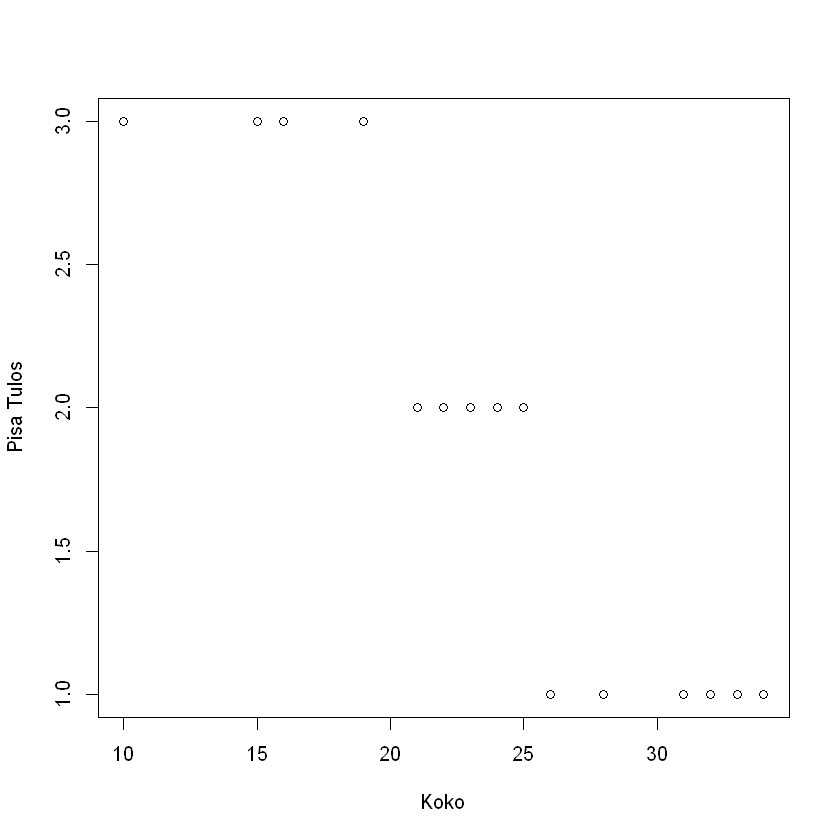

In [4]:
group_size = 10
Size = c(floor(runif(group_size, min=10, max=20)), floor(runif(group_size, min=20, max=26)), floor(runif(group_size, min=26, max=35)))
Score = c(rep(3, group_size), rep(2, group_size), rep(1, group_size))
gt25 = ifelse(Size > 25, 1, 0)
lt20 = ifelse(Size < 20, 1, 0)

df = data.frame(Size, Score, gt25, lt20)

plot(df[,"Size"],df[,"Score"],
   xlab="Koko", ylab="Pisa Tulos")

# testataan pelkkien dummyjen mallia
model = lm(Score ~ gt25 + lt20, data=df)
summary(model)

# 2 a) ja b)
### B0 + B1 * vanhaIT + B2 * luokkaKoko + B3 * vanhaIT * luokkaKoko

Nyt B1 kuvaa eroa uuden ja vanhan tietotekniikan hyödyntäjien välillä teoreettisessa tilanteessa, jossa luokkakoko on nolla. B3 kuvaa eroa luokkakoon vaikuttavuudessa ryhmien välillä. Näiden molempien tulisi hypoteesin mukaan olla nollasta poikkeavia ja negatiivisia. Tätä hypoteesia tulisi testata kertoimien yhteistestillä. 
# c)
Olisi luontevaa ajatella että sekä tietotekniikalla että luokkakoolla olisi epälineearinen yhteys tuloksiin. Siirtyminen todella vanhasta (ja kenties huonosti toimivasta) tekniikasta edes vähän uudempaan suuntaan luultavasti tuo suuremman hyödyn kuin melko uudesta tekniikasta täysin uuteen siirrytäessä. Eli vaikutus siis vähenee mitä uudeempaa tekniikka on valmiiksi.   
Myös luokkakoossa esimerkiksi siirtyminen kuudestatoista oppilaasta seistsemääntoista luultavasti vaikuttaa enemmän kuin siirtymä 28 -> 29. Logaritminen yhteys voisi tulla kyseeseen molemmissa tapauksissa. 
# d)
Sisäinen: Mittavirheitä tai valikoitumista tuskin tapahtuu sillä data tuloksista ja luokkakoista on luotettavaa ja helposti saatavilla kaikista kouluista. Simultaanisen kausaalisuuden harha on mahdollinen sillä luokkakoja on saatettu pienentää juuri luokan heikon suoriutumisen takia. Myös puuttuvat selittäjät ovat mahdollisia, esim koulun budjetti/oppilas korreloi luultavsti vahvasti IT-laitteiden tason ja ryhmäkokojen kanssa ja vaikuttaa muillakin tavoin oppimistuloksiin. 
***
Ulkoinen: Ulkoisen validiteetin ongelmaa ei tulisi olla kun aineisto on kerätty samasta populaatiosta kuin mihin sitä aiotaan soveltaa. Toki on mahdollista että malilla on eri ajanhetkien välillä on eroja. Esim viisi vuotta sitten kerätty aineisto ei enää kuvaisi hyvin tämän päivän luokkia, kenties digitalisaatio on vähentänyt luokkakoon merkitystä tai jotain vastaavaa.

In [2]:
library(lmtest)
library(sandwich)
library(car)
data = read.csv('C:/Users/rinta/koulu/mroz-mod.csv', sep=";")
head(data)

,X,age,city,educ,exper,expersq,faminc,fatheduc,hours,husage,...,huswage,kidsge6,kidslt6,lwage,motheduc,mtr_fed,nwifeinc,repwage,unem,wage
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,32,0,12,14,196,16310,7,1610,34,...,4.0288,0,1,1.2101540,12,0.7215,10.910060,2.65,5.0,3.3540
2,2,30,1,12,5,25,21800,7,1656,30,...,8.4416,2,0,0.3285121,7,0.6615,19.499980,2.65,11.0,1.3889
3,3,35,0,12,15,225,21040,7,1980,40,...,3.5807,3,1,1.5141380,12,0.6915,12.039910,4.04,5.0,4.5455
4,4,34,0,12,6,36,7300,7,456,53,...,3.5417,3,0,0.0921233,7,0.7815,6.799996,3.25,5.0,1.0965
5,5,31,1,14,7,49,27300,14,1568,32,...,10.0000,2,1,1.5242720,12,0.6215,20.100060,3.60,9.5,4.5918
6,6,54,1,12,33,1089,19495,7,2032,57,...,6.7106,0,0,1.5564800,14,0.6915,9.859054,4.70,7.5,4.7421


# 3 a)

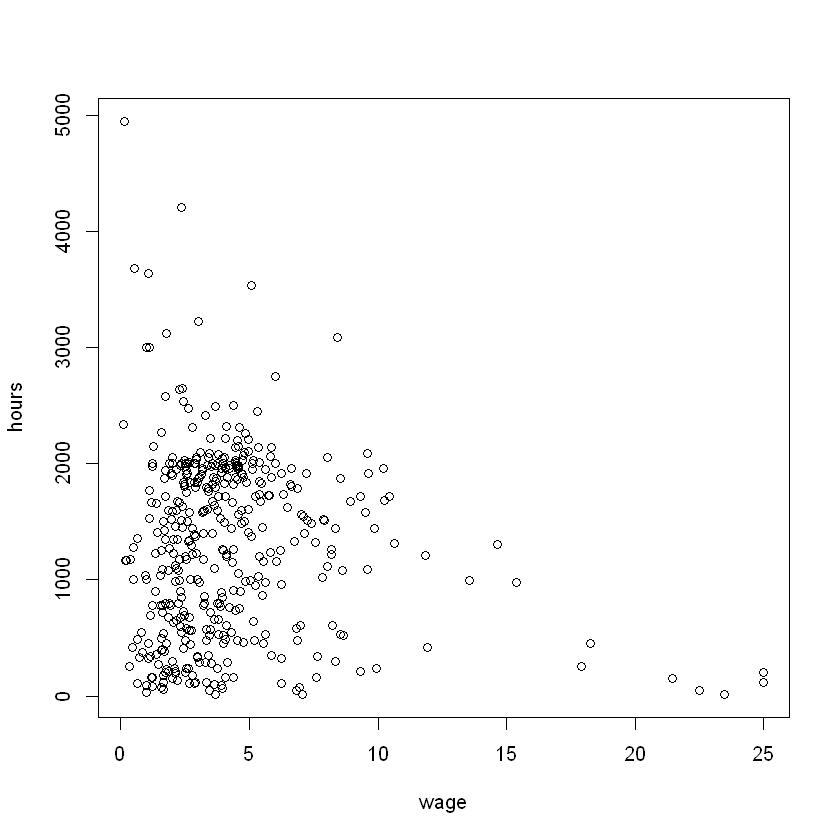

In [19]:
plot(data[,"wage"],data[,"hours"],
   xlab="wage", ylab="hours")

Vaikea sanoa, näyttää ehkä eniten siltä että palkan kasvaessa työtunnit vähenevät hieman.
Suuri hajonta vaikeuttaa lineaarisuuden tarkastelua.  
Muutamia selkeästi poikkeavia havaintoja: valtavia tuntimääriä pienillä palkoilla mutta myös suuria palkkoja erittäin pienillä tunneilla.

# b)

In [21]:
model = lm(hours ~ log(wage) + nwifeinc, data=data)
summary(model)
coeftest(model, vcov = vcovHC(model, type="HC1"))


Call:
lm(formula = hours ~ log(wage) + nwifeinc, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1319.8  -665.7    50.4   596.8  3624.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1421.639     93.255  15.245   <2e-16 ***
log(wage)     -5.608     52.420  -0.107   0.9149    
nwifeinc      -5.916      3.579  -1.653   0.0991 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 775.5 on 425 degrees of freedom
Multiple R-squared:  0.006662,	Adjusted R-squared:  0.001987 
F-statistic: 1.425 on 2 and 425 DF,  p-value: 0.2416



t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1421.6385   113.5653 12.5182  < 2e-16 ***
log(wage)     -5.6082    75.2678 -0.0745  0.94064    
nwifeinc      -5.9160     3.3373 -1.7727  0.07699 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


B1: prosentin kasvu palkassa vähentää työntekoa noin 0.05 tuntia  
B2: kun muiden perheen jäsenten kuin naisen tulot kasvavat vuodessa tuhannella vähentää nainen noin 6 tuntia työntekoaan

Palkka on kaukana tilastollisesti merkitsevästä ja nwifeinc on 10% tasolla merkitsevä
Huomion arvoista on erittäin matala selitysaste.

# c) 

Palkka sisältyy nwifeinc termiin joten sen vaikutus tulee malliin jo tätä kautta.




## d)

Lapsi aloittaa koulunkäynnin 6-7 seitsemän vuotiaana, joten äidillä on enemmän aikaa käydä töissä tämän jälkeen. 
Koulutuksen taas voidaan ajatella korreloivan työllistymismahdollisuuksien sekä palkan kanssa. Kouluttautunut nainen luultavasti löytää helpommin töitä ja paremmalla palkalla. Toisaalta ikä ja koulutus myös luultavasti korreloivat kumppanin iän ja koulutuksen kanssa jotka korreloivat perheen muiden tulojen (nwifeinc) kanssa. Esim korkeakoulutetun naisen kumppani on todennäköisemmin korkeakoulutettu ja hyvätuloinen, mikä vähentää naisen työnteon välttämättömyyttä perheen elättämisen kannalta.

In [29]:
model2 = lm(hours ~ log(wage) + nwifeinc + kidslt6 + kidsge6 + age + educ, data=data)
summary(model2)
coeftest(model2, vcov = vcovHC(model2, type="HC1"))


Call:
lm(formula = hours ~ log(wage) + nwifeinc + kidslt6 + kidsge6 + 
    age + educ, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1590.6  -595.2    93.0   525.4  3553.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2114.697    340.131   6.217 1.22e-09 ***
log(wage)    -17.408     54.215  -0.321 0.748305    
nwifeinc      -4.246      3.656  -1.161 0.246144    
kidslt6     -342.505    100.006  -3.425 0.000676 ***
kidsge6     -115.021     30.829  -3.731 0.000217 ***
age           -7.730      5.529  -1.398 0.162860    
educ         -14.445     17.968  -0.804 0.421894    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 755.2 on 421 degrees of freedom
Multiple R-squared:  0.06696,	Adjusted R-squared:  0.05366 
F-statistic: 5.035 on 6 and 421 DF,  p-value: 5.305e-05



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 2114.6973   350.3186  6.0365 3.459e-09 ***
log(wage)    -17.4078    81.3773 -0.2139 0.8307170    
nwifeinc      -4.2458     3.2235 -1.3171 0.1885143    
kidslt6     -342.5048   131.7733 -2.5992 0.0096725 ** 
kidsge6     -115.0205    29.5087 -3.8979 0.0001129 ***
age           -7.7300     5.8497 -1.3214 0.1870724    
educ         -14.4449    18.2129 -0.7931 0.4281602    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Palkan vaikutus noin kolminkertaistuu uudessa mallissa, mutta on yhä kaukana tilastollisesta merkittävyydestä. 
nwifeinc vähentyy hieman yli puolitoista ykikköä ja ei ole enää merkittävä edes 10% merkitsevyystasolla.


In [34]:
linearHypothesis(model2, c("nwifeinc=0", "log(wage)=0"), test=c("F"),vcov = vcovHC(model2, type="HC1"))

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,423,NA,NA,NA
2,421,2,0.9064144,0.404757


Eivät ole yhdessäkään merkittäviä

Tulkinnat:
Naiset joilla alle 6v lapsia tekevät 340 tuntia vähemmän töitä yli 6v lasten vaikutus puolestaan on 115 tuntia
Yksi ikävuosi vähentää noin 8 tuntia työntekoa ja yksi opiskeluvuosi 14 tuntia. 
Palkan ja nwifeinc tulkinnat ovat samat kuin aiemmin.

## 4 a)

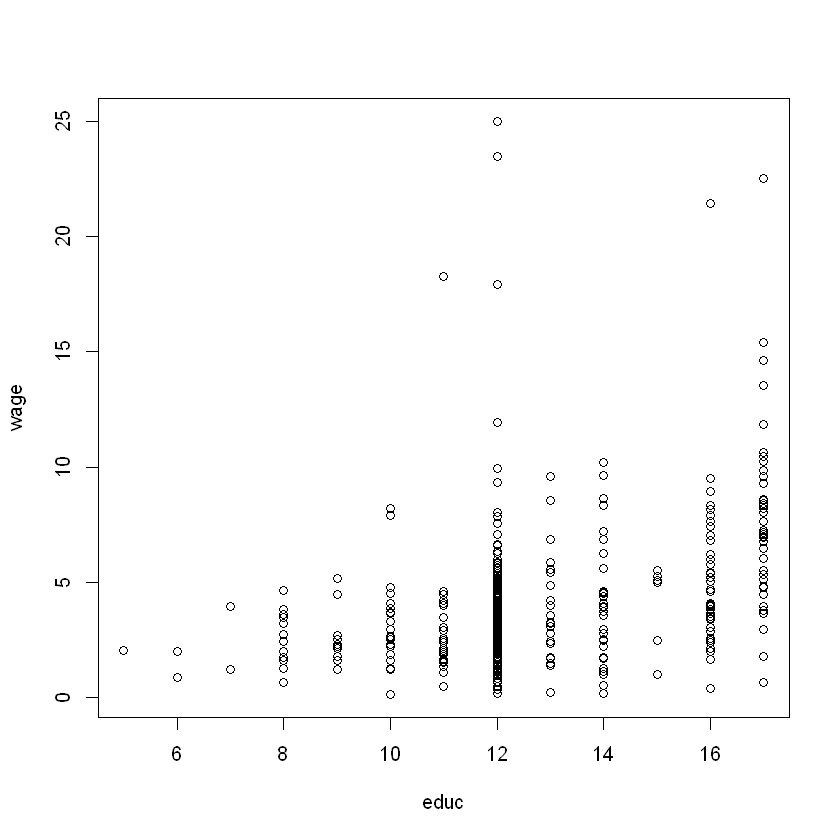

In [36]:
plot(data[,"educ"],data[,"wage"],
   xlab="educ", ylab="wage")

Koulutus nostaa tulotasoa, mutta vähenevästi. Kenties logaritminen yhteys.
6 havaintioa jossa palkat ovat todella suuret ja selvästi etäällä saman koulutusasteen hgenkilöistä.
Virhe näyttäisi kasvavan koulutetuimmilla havainnoilla, eli heteroskedastisuutta havaittavissa. 
## b)

In [37]:
model3 = lm(log(wage) ~ educ + age, data=data)
summary(model3)
coeftest(model3, vcov = vcovHC(model3, type="HC1"))


Call:
lm(formula = log(wage) ~ educ + age, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11805 -0.32595  0.08456  0.39848  2.14193 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.48756    0.26390  -1.848   0.0654 .  
educ         0.10985    0.01439   7.633 1.53e-13 ***
age          0.00684    0.00426   1.606   0.1091    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6788 on 425 degrees of freedom
Multiple R-squared:  0.1232,	Adjusted R-squared:  0.1191 
F-statistic: 29.86 on 2 and 425 DF,  p-value: 7.349e-13



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.4875591  0.2717203 -1.7943   0.07347 .  
educ         0.1098543  0.0136980  8.0197 1.039e-14 ***
age          0.0068403  0.0043524  1.5716   0.11678    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Yksi koulutusvuosi lisää tuoloja 10 prosentilla ja yksi ikävuosi 0.6 prosentilla.
Iän vaikutus ei kuitenkaan ole tilastollisesti merkitsevä edes 10% tasolla
## c)

In [38]:
model4 = lm(log(wage) ~ educ + age + exper, data=data)
summary(model4)
coeftest(model4, vcov = vcovHC(model4, type="HC1"))


Call:
lm(formula = log(wage) ~ educ + age + exper, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.05097 -0.30439  0.05568  0.39465  2.27811 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.346937   0.263361  -1.317 0.188435    
educ         0.109276   0.014201   7.695    1e-13 ***
age         -0.001406   0.004802  -0.293 0.769758    
exper        0.016325   0.004597   3.551 0.000426 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6697 on 424 degrees of freedom
Multiple R-squared:  0.1485,	Adjusted R-squared:  0.1425 
F-statistic: 24.65 on 3 and 424 DF,  p-value: 1.009e-14



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.3469374  0.2742742 -1.2649  0.206592    
educ         0.1092758  0.0133853  8.1639 3.744e-15 ***
age         -0.0014064  0.0054753 -0.2569  0.797415    
exper        0.0163246  0.0051530  3.1680  0.001646 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Koulutuksen vaikutus säilyi samana mutta iän vaikutus muuttui negatiiviseksi ja erittäin vähäiseksi (vain 0.1%).
Iän p-arvo on nyt myös hyvin suuri ja näyttää siltä ettei iällä ole vaikutusta palkaaan ollenkaan.
Uusi parametri työkokemus sen sijaan on selkeästi tilastollisesti merkitsevä ja kertoo että vuosi työkokemusta lisää tuloja 1.6 prosenttia. Muutos johuu luultavasti iän ja työkokemuksen vahvasta keskinäisestä korrelaatiosta. Nyt kun työkokemuksen ja iän vaikutukset ovat iralliset näyttää että nimenomaan työkokemuksella on kausaalinen vaikutus tuloihin.

In [40]:
linearHypothesis(model4, c("exper=age"), test=c("F"),vcov = vcovHC(model4, type="HC1"))

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,425,NA,NA,NA
2,424,1,3.427486,0.06481475


10% merkitsevyystasolla voidaan nollahypotesi voidaan hylätä. 
## d)

In [44]:
exper_squared = (data$exper)^2
model5 = lm(log(wage) ~ educ + age + exper + exper_squared, data=data)
summary(model5)
coeftest(model5, vcov = vcovHC(model5, type="HC1"))


Call:
lm(formula = log(wage) ~ educ + age + exper + exper_squared, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.08521 -0.30587  0.04946  0.37523  2.37077 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.5333761  0.2778430  -1.920  0.05557 .  
educ           0.1075228  0.0141745   7.586 2.12e-13 ***
age            0.0002836  0.0048553   0.058  0.95344    
exper          0.0415623  0.0131909   3.151  0.00174 ** 
exper_squared -0.0008152  0.0003996  -2.040  0.04195 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6672 on 423 degrees of freedom
Multiple R-squared:  0.1568,	Adjusted R-squared:  0.1489 
F-statistic: 19.67 on 4 and 423 DF,  p-value: 7.328e-15



t test of coefficients:

                 Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)   -0.53337609  0.28766252 -1.8542  0.064410 .  
educ           0.10752278  0.01330455  8.0817 6.765e-15 ***
age            0.00028365  0.00543793  0.0522  0.958425    
exper          0.04156233  0.01530424  2.7157  0.006884 ** 
exper_squared -0.00081518  0.00041354 -1.9712  0.049350 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Tuloksista voidaan päätellä että tulotaso kasvaa kokemuksen myötä mutta vähenevästi (kokemuksen neliöity termi negatiivinen -> toinen derivaatta negatiivinen). Neliöidyn termin kerroin on tilastollisesti merkitsevä voidaankin siis todeta kokemuksen ja palkan yhteyden olevan epälineaarinen.
## e)

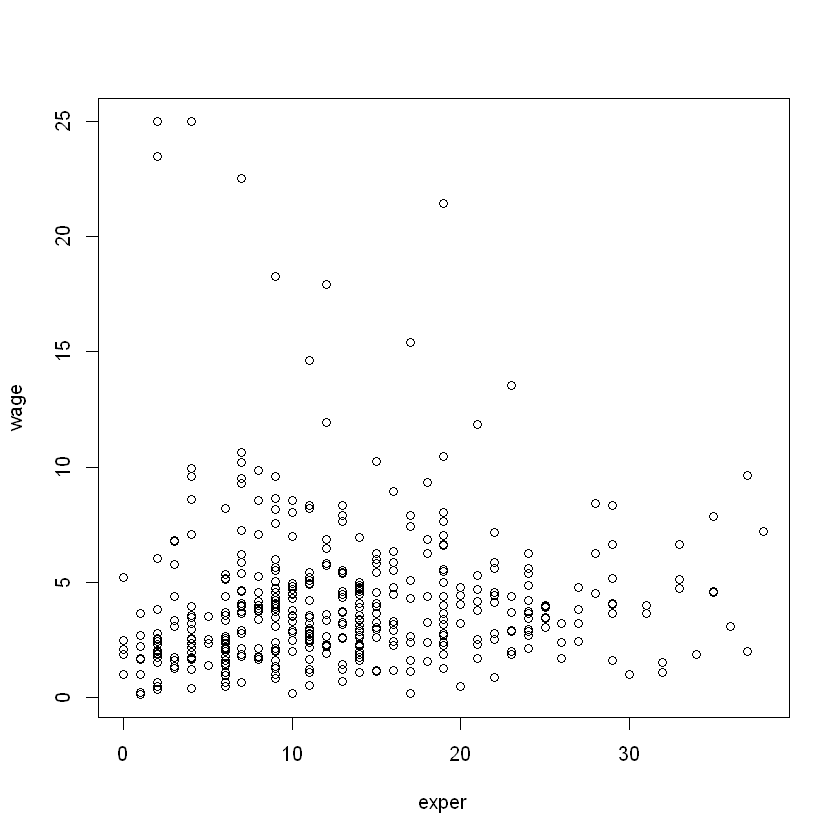

In [45]:
plot(data[,"exper"],data[,"wage"],
   xlab="exper", ylab="wage")

In [10]:
model6 = lm(log(wage) ~ exper + educ + educ*exper, data=data)
summary(model6)
coeftest(model6, vcov = vcovHC(model6, type="HC1"))



Call:
lm(formula = log(wage) ~ exper + educ + educ * exper, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.05326 -0.30923  0.05849  0.39072  2.27064 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.2982132  0.3407798  -0.875 0.382020    
exper        0.0078755  0.0219786   0.358 0.720279    
educ         0.1013038  0.0267484   3.787 0.000174 ***
exper:educ   0.0006271  0.0017376   0.361 0.718353    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6697 on 424 degrees of freedom
Multiple R-squared:  0.1486,	Adjusted R-squared:  0.1426 
F-statistic: 24.67 on 3 and 424 DF,  p-value: 9.871e-15



t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) -0.29821323  0.35075709 -0.8502 0.3956944    
exper        0.00787548  0.01951239  0.4036 0.6866996    
educ         0.10130377  0.02756669  3.6749 0.0002685 ***
exper:educ   0.00062709  0.00154610  0.4056 0.6852465    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Exper ja educ tulkinnat ovat samat kuin aiemmin. exper:educ kuvaa nyt sitä kuinka ison lisävaikutuksen työkokemus tuo koulutuksen vaikuttavuuteen. Eli koulutus nostaa palkkaa (10 + 0.06*kokemus) prosenttia.

In [11]:
linearHypothesis(model6, c("exper:educ = 0", "exper=0"), test=c("F"),vcov = vcovHC(model6, type="HC1"))

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,426,NA,NA,NA
2,424,2,7.386484,0.0007026041


Nolla hypoteesi hylätään eli työkokemuksella on merkitystä koulutksen vaikutukseen palkaan. 